<a href="https://colab.research.google.com/github/23f1000208/Physics-Inspired-Machine-Learning/blob/main/CH_5_Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 🧭 How to Use This Notebook
* 🔽 **Work top-to-bottom.** Read the explanations, then run each code cell by clicking the play button ▶️
* 💡 **Don’t worry if you don’t understand everything immediately.** Machine learning takes practice!


# ✨ Support Vector Machine (SVM)

## Abstract

Support Vector Machines (SVMs) are powerful supervised learning models that classify data by finding a decision boundary with the **maximum margin**—the widest possible separation between classes. With the right preprocessing and kernel choice, SVMs can draw **simple linear boundaries** or **flexible nonlinear curves**, making them a great tool for understanding both geometric intuition and practical model selection.

Using the classic **Fisher’s Iris dataset** (150 samples, 4 measurements, 3 species), this notebook walks through a complete, reproducible SVM workflow—from data inspection and visualization to validated tuning and final evaluation—while emphasizing best practices like **feature scaling** and **leakage-free pipelines**.

**🚀 By the end of this notebook, you will** build, visualize, tune, and evaluate linear and RBF-kernel SVM classifiers on the Iris dataset using a robust scikit-learn workflow.

### In this notebook, we will:
- 🧰 Install required packages (`numpy`, `pandas`, `matplotlib`, `seaborn`, `scikit-learn`) directly in the notebook
- 📦 Import the full set of libraries needed for data handling, visualization, modeling, and evaluation
- 🌸 Load the Iris dataset with scikit-learn and set up a clean starting point
- 🔁 Configure reproducibility (random seeds, plotting defaults, and environment checks)
- 🎯 Frame the problem as **multi-class classification** (inputs, outputs, metrics, and error types)
- 🔍 Inspect dataset structure: feature/target names, shapes, class balance, and basic ranges
- 📊 Perform EDA to understand separability and choose informative 2D feature pairs for visualization
- 🧪 Define a holdout test set plus **stratified cross-validation** for reliable model selection
- 🧠 Build SVM intuition: margins, support vectors, and how **C** trades off margin vs. training errors
- 🧼 Use **pipelines** for scaling + modeling to prevent data leakage during validation
- 📏 Train a **linear SVM baseline**, evaluate with cross-validation, and interpret results
- 🧭 Visualize decision regions, margins, and support vectors in 2D to connect geometry to errors
- 🧩 Compare **linear vs. RBF kernels**, and explain how **gamma** controls boundary complexity
- 🔄 Train an **RBF SVM**, compare performance, and reason about when nonlinearity helps
- ⚙️ Tune **C** and **gamma** with proper validation using `GridSearchCV` (log-scale ranges)
- ✅ Run final holdout evaluation with confusion matrix + per-class precision/recall and error analysis
- 🧾 (Optional) Discuss multi-class SVM strategy (one-vs-one) and probability calibration trade-offs
- 🧩 Wrap up with a practical checklist: scaling, tuning ranges, leakage avoidance, and common SVM pitfalls


## 🛠️ Setup

In this course, we will use a few Python packages. Run the following cell to make sure they are installed.


In [ ]:
!pip -q install numpy pandas matplotlib seaborn scikit-learn



---

## 📦 Imports

Let's also import all the packages that we need during the course.



In [ ]:
import sys
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

from sklearn.calibration import CalibratedClassifierCV


In [ ]:

## set the color themes of the figures
import requests
style = requests.get("https://compu-flair.com/notes/jupyter-color-style/raw").text
exec(style)

## ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")


## 📊 Data

In this course, we will work with the **Iris dataset (Fisher's Iris)** dataset and would like to use **Support vector machine** to **classify** the **iris species** (Setosa, Versicolor, or Virginica) from four flower measurements. We will discuss dataset's details later. For now, let's just load the data.

We load the dataset using scikit-learn’s `load_iris()`, then store the feature matrix in `X` and the class labels in `y`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset in its original sklearn structure (Bunch)
iris = load_iris()
X, y = iris.data, iris.target  # Features and labels

# Create a DataFrame for convenient viewing (original data unchanged)
dataset = pd.DataFrame(X, columns=iris.feature_names)
dataset["target"] = y
dataset["species"] = pd.Categorical.from_codes(y, iris.target_names)

# Display the dataset
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



## 🔍 Inspecting the Dataset Object

Before we dive into the data itself, let's inspect the object we just loaded. This will help us understand how the data is stored and where to find important information like the dataset description or feature names.


In [ ]:
# Inspect the loaded dataset object (Bunch)
print("Type of iris:", type(iris))

if hasattr(iris, "keys"):
    keys = list(iris.keys())
    print("iris keys:", keys)
    print("'DESCR' in iris keys?:", "DESCR" in keys)
else:
    print("iris has no .keys() method")

# If present, show where the metadata/description is stored
if hasattr(iris, "DESCR"):
    print("iris.DESCR exists; length:", len(iris.DESCR))
    print("iris.DESCR preview:\n", iris.DESCR[:500])
else:
    print("iris.DESCR attribute not found")

Type of iris: <class 'sklearn.utils._bunch.Bunch'>
iris keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
'DESCR' in iris keys?: True
iris.DESCR exists; length: 2656
iris.DESCR preview:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====


## 📚 Learn more about data

🔎 **We always want to learn the column names of dataset and what they actually mean (attribute information)**

In the `iris` Bunch object, the **feature (column) names** are stored in `iris.feature_names`, while the actual **feature values** are in `iris.data`. The **target labels** are in `iris.target`, their **class names** are in `iris.target_names`, and the detailed **descriptions/attribute information** (what each feature means) can be found in `iris.DESCR`.

In [ ]:
# Display feature and target info (names + descriptions) from the sklearn Bunch
print("Dataset type:", type(iris))
print("\nFeature names:")
for i, name in enumerate(iris.feature_names):
    print(f"  {i}: {name}")

print("\nTarget names:")
for i, name in enumerate(iris.target_names):
    print(f"  {i}: {name}")

print("\nDataset description (DESCR):")
print(iris["DESCR"] if "DESCR" in iris else iris.DESCR)

Dataset type: <class 'sklearn.utils._bunch.Bunch'>

Feature names:
  0: sepal length (cm)
  1: sepal width (cm)
  2: petal length (cm)
  3: petal width (cm)

Target names:
  0: setosa
  1: versicolor
  2: virginica

Dataset description (DESCR):
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1

## 🔧 Course Setup: Environment and Reproducibility

To make machine learning experiments reliable, we need runs to be as repeatable as possible. This setup step establishes a single **random seed** (`RANDOM_STATE = 42`) so that any randomness in NumPy-based operations produces the same results each time you execute the notebook. This reduces “it worked yesterday” confusion and makes comparisons between models and settings meaningful.

This cell also prints key **environment details**—Python version, operating system/platform, and library versions (scikit-learn, NumPy, pandas). Recording these versions is important because small differences between library releases can change model behavior, defaults, or outputs.

Finally, it applies a consistent **seaborn plotting context**, helping your charts look uniform across runs and machines, which improves readability when you’re inspecting results.

In [ ]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
import sklearn
print("scikit-learn:", sklearn.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)

# Consistent plotting
sns.set_context("notebook")


Python: 3.11.14
Platform: macOS-15.6.1-arm64-arm-64bit
scikit-learn: 1.7.1
numpy: 2.3.2
pandas: 2.3.2


## 🧭 Problem Framing: Predicting Iris Species (Multi-Class Classification)

In this step, we clearly define the machine learning problem we’re trying to solve so that model choices and evaluation later make sense.

**Task type:** *Multi-class classification* — we want to assign each flower to **one of three species**.

### What are the inputs and outputs?
- **Inputs (features):** four numeric measurements:
  - sepal length, sepal width
  - petal length, petal width
- **Output (label):** a **species class** (3 possible classes)

### What is the goal?
The goal is not just to fit the dataset we have, but to **learn a mapping from measurements → species that generalizes to unseen flowers**. That emphasis on generalization is what makes this a predictive modeling task.

### How will we judge performance?
For a small, clean dataset like Iris, we focus on straightforward, interpretable evaluation:
- **Accuracy** for an overall summary
- **Per-class precision/recall** to see whether any species is harder to predict
- **Confusion matrix** to understand *which* classes are being mixed up

### What kinds of errors matter most?
Not all mistakes are equally likely:
- **Setosa** is typically easy to separate
- Confusions more often happen between **versicolor vs. virginica**, so we pay special attention to misclassifications between similar species

If class names are available from the dataset metadata, they’re displayed to make the classification targets explicit.

In [ ]:
# Define task framing using available metadata when possible.

task_type = "classification"

if "iris" in globals() and hasattr(globals()["iris"], "target_names"):
    target_names = list(globals()["iris"].target_names)
else:
    # Fallback from df if present
    target_names = None
    if "df" in globals() and df is not None:
        if "species" in df.columns:
            target_names = sorted(df["species"].unique().tolist())
        elif "target" in df.columns:
            target_names = sorted(pd.unique(df["target"]))

print("Task:", task_type)
print("Goal: Learn a mapping from 4 measurements to 1 of 3 species; generalize to unseen flowers.")
print("Inputs: sepal length/width, petal length/width (numeric features)")
print("Output: species label (3 classes)")
print("Primary metrics: accuracy, per-class precision/recall, confusion matrix")
print("Key error types: confusing similar species (typically versicolor vs virginica) vs easy separations (setosa)")
if target_names is not None:
    print("Classes:", target_names)


Task: classification
Goal: Learn a mapping from 4 measurements to 1 of 3 species; generalize to unseen flowers.
Inputs: sepal length/width, petal length/width (numeric features)
Output: species label (3 classes)
Primary metrics: accuracy, per-class precision/recall, confusion matrix
Key error types: confusing similar species (typically versicolor vs virginica) vs easy separations (setosa)
Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


## 🔍 Load and Inspect the Iris Dataset

Before modeling, it’s important to confirm that the dataset you’re about to use matches your expectations. In this step, we establish a canonical **feature matrix** `X` and **target vector** `y` (using a `DataFrame` if available), and we record the **feature names** and **target name** so later outputs remain interpretable.

You will verify a few key sanity checks:

- **Columns and roles:** Which columns are being treated as input features vs. the prediction target.
- **Shapes:** The dimensions of `X` and `y` (number of samples and number of features), ensuring they align correctly.
- **Class balance:** How many examples exist per class, which helps detect imbalance issues early.
- **Basic value ranges:** Minimum and maximum values per feature to catch obvious data problems (unexpected units, negative values where they shouldn’t exist, or extreme outliers).

A small preview of the first rows (when a `DataFrame` is present) provides a quick visual confirmation that the data looks reasonable.

In [ ]:
# Establish canonical X/y from df if needed, plus feature/target names.

feature_names = None
target_name = None

if "iris" in globals() and hasattr(globals()["iris"], "feature_names"):
    feature_names = list(globals()["iris"].feature_names)
    target_name = "target"

if "df" in globals() and df is not None:
    # Determine feature columns: prefer iris.feature_names if present
    if feature_names is not None and all(c in df.columns for c in feature_names):
        feature_cols = feature_names
    else:
        # Fallback: numeric columns excluding obvious target columns
        exclude = {"target", "species"}
        feature_cols = [c for c in df.columns if c not in exclude and pd.api.types.is_numeric_dtype(df[c])]

    # Determine y column
    if "target" in df.columns:
        y_col = "target"
    elif "species" in df.columns:
        y_col = "species"
    else:
        y_col = None

    if y_col is not None:
        X = df[feature_cols].to_numpy()
        y = df[y_col].to_numpy()
        feature_names = feature_cols
        target_name = y_col

    print("DataFrame columns:", list(df.columns))
    print("Feature columns:", feature_cols)
    print("Target column:", y_col)

print("X shape:", np.asarray(X).shape)
print("y shape:", np.asarray(y).shape)

# Class balance
classes, counts = np.unique(y, return_counts=True)
print("Class distribution:")
for c, n in zip(classes, counts):
    print(f"  class {c}: {n}")

# Basic ranges
X_arr = np.asarray(X)
print("Feature mins:", X_arr.min(axis=0))
print("Feature maxs:", X_arr.max(axis=0))

# Quick view
if "df" in globals() and df is not None:
    display(df.head(10))


X shape: (150, 4)
y shape: (150,)
Class distribution:
  class 0: 50
  class 1: 50
  class 2: 50
Feature mins: [4.3 2.  1.  0.1]
Feature maxs: [7.9 4.4 6.9 2.5]


## 💡 Interpretation of the results

- The data shapes confirm 150 samples with 4 input features (X) and a matching 150-target vector (y), ready for modeling.

- The target distribution shows three classes (0, 1, 2) with 50 samples each, indicating a perfectly balanced dataset.

- Feature ranges are specified with minimums [4.3, 2.0, 1.0, 0.1] and maximums [7.9, 4.4, 6.9, 2.5], suggesting inputs lie within reasonable, non-extreme bounds.

- These checks collectively indicate consistent data preparation: matched sample sizes, balanced classes, and sensible feature extents.

## 🔎 Exploratory Data Analysis: Separability and Feature Pair Selection

In this step, we use **pairwise plots** and **class-conditional feature distributions** to understand how well the classes can be separated using the available features.

### What you’re looking for
- **Separable classes:** Feature pairs where different classes form distinct clusters with minimal overlap. These are strong candidates for simple, interpretable models and clear visual decision boundaries.
- **Overlapping regions:** Areas where classes mix heavily. These indicate ambiguity—models may need more features or more flexible decision boundaries to perform well.
- **Informative features:** Features whose distributions differ noticeably across classes (e.g., shifted peaks or different spread), suggesting they carry discriminative signal.

### What this accomplishes
- The **pairplot** gives a compact overview of how every feature pair behaves when colored by class, helping you quickly spot “good” 2D views.
- The **per-feature distributions (KDEs)** show how each feature varies by class, revealing which features are likely to help classification and which contribute less.

### Outcome: a chosen 2D feature pair
At the end, we select a **single pair of features** (`viz_features`) to use for clean 2D visualization. If the dataset includes Iris-style names, we default to **petal length** and **petal width**, since they often provide strong separation; otherwise, we fall back to the first two features. This makes subsequent plots easier to interpret and compare.

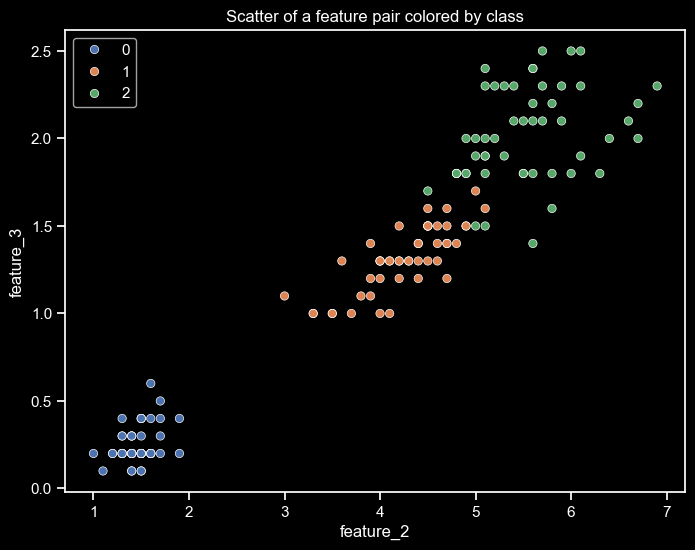

Selected features for 2D visualization: ['petal length (cm)', 'petal width (cm)']


In [ ]:
# Pairwise plots and distributions

if "df" in globals() and df is not None and "species" in df.columns:
    hue_col = "species"
elif "df" in globals() and df is not None and "target" in df.columns:
    hue_col = "target"
else:
    hue_col = None

if "df" in globals() and df is not None and hue_col is not None:
    plot_df = df.copy()
    # Limit to core feature columns if known
    if feature_names is not None:
        cols = feature_names + [hue_col]
        plot_df = plot_df[cols]

    sns.pairplot(plot_df, hue=hue_col, corner=True, diag_kind="hist")
    plt.show()

    # Class-conditional distributions per feature
    n_features = len(feature_names) if feature_names is not None else (plot_df.shape[1] - 1)
    fig, axes = plt.subplots(nrows=n_features, ncols=1, figsize=(10, 3 * n_features), sharex=False)
    if n_features == 1:
        axes = [axes]

    for ax, col in zip(axes, feature_names if feature_names is not None else [c for c in plot_df.columns if c != hue_col]):
        sns.kdeplot(data=plot_df, x=col, hue=hue_col, common_norm=False, fill=True, alpha=0.25, ax=ax)
        ax.set_title(f"Distribution of {col} by class")
    plt.tight_layout()
    plt.show()
else:
    # Fallback: plot pairwise scatter for two selected features from X
    X_arr = np.asarray(X)
    pair = (2, 3) if X_arr.shape[1] >= 4 else (0, 1)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_arr[:, pair[0]], y=X_arr[:, pair[1]], hue=y, palette="deep")
    plt.title("Scatter of a feature pair colored by class")
    plt.xlabel(f"feature_{pair[0]}")
    plt.ylabel(f"feature_{pair[1]}")
    plt.show()

# Select a good 2D pair for later decision-region visualization
# Iris is commonly well-separated by (petal length, petal width)
if feature_names is not None:
    if "petal length (cm)" in feature_names and "petal width (cm)" in feature_names:
        viz_features = ["petal length (cm)", "petal width (cm)"]
    else:
        viz_features = feature_names[:2]
else:
    viz_features = [0, 1]

print("Selected features for 2D visualization:", viz_features)


## 💡 Interpretation of the results

In this cell, two features were chosen for a 2D visualization: petal length (cm) and petal width (cm). The output includes a scatter plot, where each point is colored by its class (blue for 0, orange for 1, green for 2).

Seen in the plot, the points form three roughly diagonal bands: blue occupy the lower-left region, orange sits in the middle, and green appear toward the upper-right. There is minimal overlap between colors, indicating good separability for this feature pair. A positive relationship is also visible: as one feature increases, the other tends to increase across the classes.

Together with the printed feature selection, these visuals convey a clear discriminative structure in this 2D view. The strength and interpretability of this pattern suggest simple decision boundaries could effectively separate the classes using these two features.

Key takeaway: petal length and petal width provide a concise, separable 2D representation of the data, offering an interpretable basis for visualization and straightforward decision rules.

## Split Strategy and Baselines: Holdout Set plus Stratified Cross-Validation

To evaluate models reliably—especially with limited data—we separate **final evaluation** from **model selection**.

### 1) Create a stratified holdout test set (final evaluation)
We split the data into a **training set** and a **test set** (here, 80/20). The split is **stratified**, meaning the class distribution is kept approximately the same in both sets. This matters for classification problems because an imbalanced test set can give misleading performance estimates.

The test set is reserved for a *one-time* evaluation of the chosen approach, providing an unbiased estimate of how the model might perform on new data.

### 2) Define stratified cross-validation (model selection on the training set)
Within the training data, we set up **Stratified K-Fold cross-validation** (5 folds). Stratification again preserves class proportions inside each fold, which makes comparisons between models and hyperparameters more stable and fair when classes are uneven.

### 3) Establish a simple baseline for context
We compute a **majority-class baseline accuracy**: the accuracy you’d get by always predicting the most common class in the training data. This baseline is not a goal—it’s a sanity check. Any useful model should outperform it, and it helps you interpret whether a reported accuracy is genuinely meaningful.

In [ ]:
# Stratified split and CV scheme

X_arr = np.asarray(X)
y_arr = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_arr, y_arr,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_arr
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
print("CV:", cv)

# Simple baseline: most frequent class accuracy
majority_class = pd.Series(y_train).value_counts().idxmax()
baseline_acc = np.mean(y_test == majority_class)
print("Majority-class baseline on test (for reference):", baseline_acc)


Train shapes: (120, 4) (120,)
Test shapes: (30, 4) (30,)
CV: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Majority-class baseline on test (for reference): 0.3333333333333333


## 💡 Interpretation of the results

You’re evaluating a simple, stratified split scenario. The dataset is split into 120 training samples (with 4 features and 120 labels) and 30 test samples (with 4 features and 30 labels), reflecting an 80/20 train–test split that preserves class proportions.

To assess generalization, a 5-fold StratifiedKFold cross-validation is used, with shuffling and a fixed random seed to ensure reproducibility and that each fold maintains similar class distributions.

The reported baseline is the accuracy you’d get by always predicting the most frequent class observed in the training data. On the test set, this baseline equals 0.3333 (33.33%), which corresponds to the most frequent class appearing in 10 of the 30 test samples.

Key takeaway: to demonstrate any real predictive value, your model should exceed roughly 33% accuracy on this test split. If a model’s performance sits around or below this threshold, it isn’t beating the simple majority-class predictor for this setup.

## 🧭 SVM Intuition, Margins, and Support Vectors

At its core, an SVM tries to:

> **separate data points of different classes using the *best possible boundaries*.**

A possible boundary is a hyperplane in the feature space:
  - For example if a dataset has **9 features**, the decision boundary is an **8-dimensional hyperplane** embedded in the **9-dimensional feature space**


### ❓ Which boundary line (hyperplane) should we choose?

There are **many possible lines** that can separate the classes.

SVM answers this with a bold idea:

> **Choose the line that maximizes the margin.**


### The Margin 🛣️

The **margin** is the distance between:
- The decision boundary
- The closest data points from *each* class

**Margin** ($M$) is mathematically defined as:

$$
M = \frac{2}{\|w\|}
$$
where $ w $ is the weight vector as we see it below. It is a free parameter to be set by minimizing the loss function.

### Support Vectors 🧷

Support Vectors are:
- The **closest points** to the decision boundary
- The points that **define the margin**
- The *only* points that influence the final model

💡 Move any non-support-vector point → decision boundary stays the same  
💡 Move a support vector → decision boundary changes


### The Decision Boundary

In a linear SVM, the decision boundary is:

$$
w^T x + b = 0
$$

Where:
- $ w $: weight vector (direction of the boundary)
- $ b $: bias (offset)
- $ x $: input feature vector



### Hard Margin SVM (Perfect Separation)

If data is **perfectly separable**, SVM solves:

$$
\min_{w, b} \frac{1}{2} ||w||^2
$$

Subject to:
$$
y_i (w^T x_i + b) \ge 1
$$
for all data points, indexed by $i$.

### Interpretation:
- Minimize $ ||w|| $ → maximize margin
- Enforce all points to be correctly classified **outside the margin**

⚠️ Problem: **Real-world data is rarely perfectly separable**


### Soft Margin SVM: Allowing Mistakes 😌

To handle noisy or overlapping data, we add a penalty term to the loss function. In this case the ⚖️ **SVM Loss (Hinge Loss)** becomes

$$
\mathcal{L} = \frac{1}{2}|w|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i(w \cdot x_i + b))
$$

This allows:
- Some points inside the margin
- Some misclassified points





### The C Trade-off Parameter ⚖️

This is **one of the most important ideas in SVM**.

| C Value | Behavior |
|------|---------|
| **Large C** | Penalizes errors heavily |
| | Smaller margin |
| | Low bias, **high variance** |
| **Small C** | Allows more errors |
| | Larger margin |
| | Higher bias, **lower variance** |


📌 **C controls the trade-off between:**
- Maximizing margin  
- Minimizing classification error  


📌 **Bias–Variance Perspective**
- Large C → model fits training data tightly → risk of overfitting
- Small C → smoother boundary → better generalization


## 🧐 Exploring the C Trade-off

Let's now explore C trade-off in this dataset.

### 🛤️ What we’re exploring
We train the same linear SVM multiple times while changing only **`C`**. For each value, we record:

- **🎯 Training accuracy**: how well the model fits the training data  
- **🔄 Cross-validated accuracy**: a more realistic estimate of performance on unseen data  
- **🧱 Number of support vectors**: how many training points the model relies on to define the boundary


In practice, as you increase `C`, the model is encouraged to classify more training points correctly, even if that means a narrower margin.

### 🤔 Why support vectors matter
Only **support vectors** directly influence the decision boundary. Points far from the boundary usually don’t matter. Watching how the **count of support vectors changes with `C`** helps you see how “strict” or “flexible” the model is being.

### 📊 How to read the output
- The printed table lets you compare **fit (train accuracy)** vs **generalization (CV accuracy)** across `C`.
- The plot shows **# support vectors vs `C` (log scale)**. Look for patterns like:
  - **🐢 Small `C` → often more support vectors and lower training accuracy**
  - **🐇 Large `C` → often fewer training errors and potentially fewer support vectors**

The main takeaway: tuning `C` isn’t just about accuracy—it changes **how the SVM boundary is determined** and **how sensitive the model is to individual training points**.

        C  train_acc    cv_acc  n_support_vectors
0    0.01   0.891667  0.883333                106
1    0.10   0.975000  0.975000                 56
2    1.00   0.975000  0.975000                 23
3   10.00   0.975000  0.966667                 14
4  100.00   0.983333  0.958333                 11


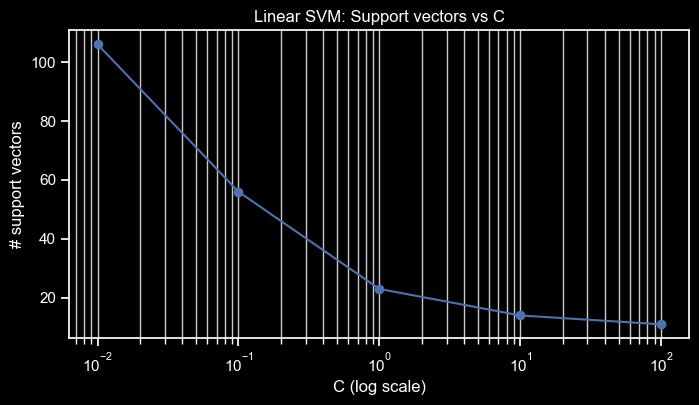

In [ ]:
# Demonstrate effect of C on #support vectors and training fit (no heavy theory text).

Cs = [0.01, 0.1, 1.0, 10.0, 100.0]
rows = []

pipe_template = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", random_state=RANDOM_STATE))
])

for C in Cs:
    pipe = pipe_template.set_params(svm__C=C)
    pipe.fit(X_train, y_train)
    train_acc = pipe.score(X_train, y_train)
    cv_acc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy").mean()
    n_sv = pipe.named_steps["svm"].n_support_.sum()
    rows.append({"C": C, "train_acc": train_acc, "cv_acc": cv_acc, "n_support_vectors": int(n_sv)})

svm_c_sweep = pd.DataFrame(rows)
print(svm_c_sweep)

plt.figure(figsize=(8, 4))
plt.semilogx(svm_c_sweep["C"], svm_c_sweep["n_support_vectors"], marker="o")
plt.title("Linear SVM: Support vectors vs C")
plt.xlabel("C (log scale)")
plt.ylabel("# support vectors")
plt.grid(True, which="both", axis="x")
plt.show()


## 💡 Interpretation of the results

You explored how a linear SVM behaves as the regularization parameter C changes, printing a small table of train and cross-validated (CV) accuracy alongside the number of support vectors, and you also inspected a plot of the number of support vectors versus C on a log-scaled x-axis.

- Across these values, increasing C tends to reduce the number of support vectors while training accuracy rises or stays high; CV accuracy improves up to around C = 0.1–1.0 (reaching ~0.975 at C = 0.1) but can dip slightly at the largest C tested (_cv ~0.958 at C = 100_).
- The combined numeric and visual evidence illustrates the C trade-off: larger C yields a tighter fit with fewer support vectors and potentially higher training accuracy, while CV accuracy may not improve and can decline at very high C. The key lesson is to balance C to maintain good generalization, with the best CV observed near medium C values (around 0.1).

## 🔧 Preprocessing with Pipelines: Scaling and Leakage Prevention

Many models (including SVMs) are sensitive to the *scale* of input features. Standardizing features (zero mean, unit variance) often improves performance and makes the model’s optimization behave more consistently.

The key idea in this step is to **bundle preprocessing and modeling into a single `Pipeline`**. This ensures that **scaling is learned only from the training portion of each cross-validation fold**, and then applied to that fold’s validation portion. That behavior is essential to prevent **data leakage**—where information from the validation data accidentally influences preprocessing and leads to overly optimistic evaluation results.

By running cross-validation directly on the pipeline, the reported accuracy reflects a more realistic estimate of how the model will perform on truly unseen data.

In [ ]:
# Build a standard pipeline to ensure scaling is fit only on training folds.

svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE))
])

print(svm_pipe)

# Show that CV is performed on the pipeline (scaler fit within each fold)
cv_scores = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring="accuracy")
print("Pipeline CV accuracy: mean=%.4f std=%.4f" % (cv_scores.mean(), cv_scores.std()))


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(kernel='linear', random_state=42))])
Pipeline CV accuracy: mean=0.9750 std=0.0333


## 💡 Interpretation of the results

- Pipeline architecture: A simple preprocessing-and-classification workflow composed of StandardScaler for feature scaling, followed by a linear SVC classifier. The linear kernel and a fixed random_state make the results reproducible.

- Cross-validation performance: The reported cross-validated accuracy is a mean of 0.9750 with a standard deviation of 0.0333 across folds.

- What that implies: The model achieves a very high average accuracy and moderate stability across folds. Because scaling is learned from training data in each fold, the evaluation avoids data leakage and provides a realistic estimate of performance on unseen data.

- Takeaways: This setup demonstrates the benefit of standardizing features before a linear SVM; the results indicate strong generalization with consistent fold-to-fold performance, aided by reproducibility from the fixed random state.

## 🧭 Baseline Model: Linear SVM in a Pipeline

This step trains a **baseline classifier** using a **linear Support Vector Machine (SVM)** and evaluates how well it generalizes. A strong, simple baseline is valuable because it sets a performance reference point and helps you detect whether later, more complex models are truly improving results.

### What this accomplishes
- **Builds a robust training setup** by combining feature scaling and a linear SVM into a single pipeline. Scaling matters here because SVMs are sensitive to feature magnitude.
- **Estimates expected performance with cross-validation** on the training set, reporting the mean and variability (standard deviation) of accuracy. This provides a more reliable view than a single train/test split.
- **Evaluates on a holdout test set** to measure real-world generalization using:
  - overall **accuracy**
  - a **classification report** (precision/recall/F1 by class)
  - a **confusion matrix** to visualize which classes are being confused


Linear SVM CV accuracy: mean=0.9750 std=0.0333
Holdout accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



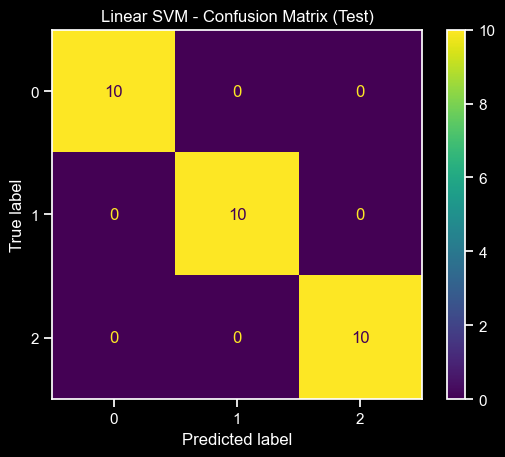

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.452522,0.343920,-0.867946,-0.941712
1,-0.061777,0.141885,-0.553506,-0.557339
2,0.227659,0.344746,-1.890040,-2.152613


In [ ]:
# Fit baseline linear SVM and evaluate on holdout

linear_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE))
])

linear_cv = cross_val_score(linear_svm, X_train, y_train, cv=cv, scoring="accuracy")
print("Linear SVM CV accuracy: mean=%.4f std=%.4f" % (linear_cv.mean(), linear_cv.std()))

linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)

print("Holdout accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format="d")
plt.title("Linear SVM - Confusion Matrix (Test)")
plt.show()

# If feature names are known, show feature contributions per class (linear SVM coefficients)
svm_step = linear_svm.named_steps["svm"]
if hasattr(svm_step, "coef_"):
    coef = svm_step.coef_  # (n_classes, n_features) for OvR; in multi-class for SVC linear uses one-vs-one internally but exposes coef_ via liblinear? Here it exists for linear kernel SVC.
    if coef.ndim == 2 and feature_names is not None:
        coef_df = pd.DataFrame(coef, columns=feature_names)
        display(coef_df)


## 💡 Interpretation of the results

You trained a Linear SVM on a 3-class problem (classes 0, 1, and 2) with features named sepal length, sepal width, petal length, and petal width.

- Cross-validation perspective: The CV mean accuracy is about 0.975 with a small variability (std ≈ 0.033), indicating the model generalizes well across folds on the training data.

- Holdout/test perspective: The model achieves perfect performance on the holdout test set (accuracy 1.0). The per-class metrics (precision, recall, F1) are 1.00 for all three classes, signaling flawless predictions for each class.

- Confusion matrix visualization: The matrix shows a 3×3 grid where all true-label predictions are correct; diagonal entries are 10 and off-diagonal entries are 0. This confirms 100% per-class accuracy on the test set, with balanced performance across classes.

- The printed table (The per-class coefficients table (one-vs-rest)): Shows feature contributions for the sake of interpretability. Each row corresponds to a class (0, 1, 2) and each column to a feature. The coefficients reflect how strongly each feature pushes the model toward predicting each class.


## 🔍 Visual Diagnostics: 2D Decision Regions, Margins, and Support Vectors

This step builds an intuitive, geometric understanding of how a linear SVM makes decisions by projecting the problem down to **two features** and visualizing the resulting classifier.

### What this does
- **Selects a 2D feature pair** and splits it into a train/test holdout set.
- **Fits a linear SVM** (with feature scaling) on just these two dimensions.
- **Visualizes the decision regions** across the 2D plane, showing which parts of the feature space the model assigns to each class.
- **Highlights the support vectors**—the training points that most strongly shape the separating boundary.

### Why it matters
Seeing the classifier in 2D helps you connect model behavior to data geometry:
- If classes are **well separated** in this view, the regions look clean and support vectors tend to lie near the boundary.
- If classes **overlap**, you’ll often see mixed regions and more support vectors clustered near ambiguous areas—an indication that errors are driven by the data, not just model choice.
- The printed **2D holdout accuracy** provides a quick check of how predictive this feature pair is on its own (useful for diagnosing whether the model’s difficulty comes from limited feature signal vs. separability).

Use this plot to reason about *where* the model struggles, *which points* determine the boundary, and *how much overlap* exists between classes in the chosen feature pair.

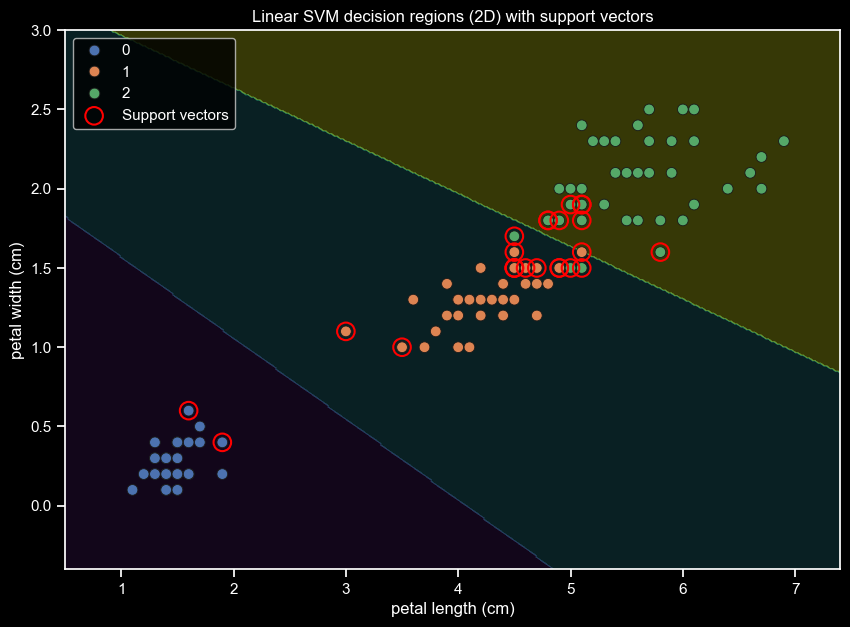

2D holdout accuracy: 0.9333333333333333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Default
if "viz_features" not in globals():
    viz_features = [0, 1]

def _select_2d_features(X, y, viz_features, df=None):
    # If user provided column names and df exists, use df
    if isinstance(viz_features, (list, tuple)) and len(viz_features) == 2 and all(isinstance(v, str) for v in viz_features):
        if df is not None:
            X2 = df[list(viz_features)].to_numpy()
            xlab, ylab = viz_features
            return X2, np.asarray(y), xlab, ylab
        # Otherwise, try to map names via feature_names/columns if present
        if hasattr(X, "columns"):
            X2 = X.loc[:, list(viz_features)].to_numpy()
            xlab, ylab = viz_features
            return X2, np.asarray(y), xlab, ylab
        if "feature_names" in globals() and feature_names is not None:
            names = list(feature_names)
            idx = [names.index(viz_features[0]), names.index(viz_features[1])]
            X_arr = np.asarray(X)
            X2 = X_arr[:, idx]
            xlab, ylab = viz_features
            return X2, np.asarray(y), xlab, ylab
        raise ValueError("viz_features are strings but no dataframe/feature names mapping is available.")

    # Numeric indices / boolean mask / slice
    X_arr = np.asarray(X)
    if isinstance(viz_features, slice):
        X2 = X_arr[:, viz_features]
        xlab, ylab = "feature_0", "feature_1"
    else:
        vf_arr = np.asarray(viz_features)
        if vf_arr.dtype == bool:
            X2 = X_arr[:, vf_arr]
            xlab, ylab = "feature_0", "feature_1"
        else:
            vf_idx = vf_arr.astype(int).tolist()
            X2 = X_arr[:, vf_idx]
            if len(vf_idx) == 2:
                xlab, ylab = f"feature_{vf_idx[0]}", f"feature_{vf_idx[1]}"
            else:
                xlab, ylab = "feature_0", "feature_1"

    if X2.ndim != 2:
        raise ValueError("Selected features did not produce a 2D array.")
    if X2.shape[1] != 2:
        raise ValueError(f"Need exactly 2 features for 2D visualization, got {X2.shape[1]}.")

    return X2, np.asarray(y), xlab, ylab

_df = df if ("df" in globals() and df is not None) else None
X2, y2, xlab, ylab = _select_2d_features(X, y, viz_features, df=_df)

# Ensure RANDOM_STATE exists
if "RANDOM_STATE" not in globals() or RANDOM_STATE is None:
    RANDOM_STATE = 42

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=RANDOM_STATE, stratify=y2
)

model_2d = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE))
])
model_2d.fit(X2_train, y2_train)

# Mesh for decision region (in original feature space)
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = model_2d.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="viridis")

sns.scatterplot(
    x=X2_train[:, 0],
    y=X2_train[:, 1],
    hue=y2_train,
    palette="deep",
    edgecolor="k",
    s=60
)

# Overlay support vectors (convert to original feature space for plotting)
svm2 = model_2d.named_steps["svm"]
scaler2 = model_2d.named_steps["scaler"]
X2_train_scaled = scaler2.transform(X2_train)
sv_idx = svm2.support_
X2_sv = X2_train[sv_idx]

plt.scatter(
    X2_sv[:, 0],
    X2_sv[:, 1],
    s=160,
    facecolors="none",
    edgecolors="red",
    linewidths=1.5,
    label="Support vectors"
)

plt.title("Linear SVM decision regions (2D) with support vectors")
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend(loc="best")
plt.show()

print("2D holdout accuracy:", model_2d.score(X2_test, y2_test))

## 💡 Interpretation of the results

You trained a scaled linear SVM on two features (petal length and petal width) and examined both a 2D decision-region plot and the hold-out accuracy on a 20% test split.

- Visualization perspective: The 2D plot reveals a straight decision boundary that separates predicted regions for the three classes. The background shading shows which class the model assigns to each area, while the training points are colored by their true class (blue, green, orange). Red circles designate the support vectors—the critical points that shape the margin around the boundary. The three clusters map to distinct regions, with the blue and green groups occupying separate sides and the orange points lying near or between regions, highlighting where the boundary is most susceptible to misclassification. The margin around the boundary reflects the influence of the support vectors.

- Numeric perspective: The 2D holdout accuracy is 0.9333 (93.33%), calculated on the test portion of the chosen feature pair after scaling. This high accuracy suggests good separability for these two features in this view and indicates the model generalizes well to unseen data within this setup.

- Integrated takeaway: The strong agreement between the clear, linear decision boundary in the visualization and the high holdout accuracy reinforces that these two features provide meaningful discrimination for the classes in this 2D space. The plot helps you see where the boundary is confident and where points near the margin—especially orange points near the line—could be misclassified, which complements the quantitative metric.

## 🧠 Kernels and Similarity: Linear vs RBF and the Role of Gamma

Support Vector Machines (SVMs) can learn very different decision boundaries depending on the **kernel** used.

Kernels define how similarity between data points is measured and, implicitly, what kind of decision boundary the model can represent.


## 🆚 Linear vs. RBF (Gaussian) Kernels

### 🔹 Linear Kernel 📏

> **This is what we have done so far.**

The **linear kernel** assumes the classes can be separated by a straight line (or hyperplane in higher dimensions) in the original feature space.

Mathematically, the linear kernel is simply an inner product:
$$
K(\mathbf{x}, \mathbf{x}') = \mathbf{x}^\top \cdot \mathbf{x}'
$$

The resulting decision function has the form:
$$
f(\mathbf{x}) = \mathbf{w}^\top \cdot \mathbf{x} + b
$$


### 🔹 RBF (Gaussian) Kernel 🌀
The **RBF kernel** allows the SVM to learn **nonlinear** decision boundaries by comparing points based on distance rather than raw feature alignment.

The RBF kernel is defined as:
$$
K(\mathbf{x}, \mathbf{x}') = \exp\left(-\gamma \|\mathbf{x} - \mathbf{x}'\|^2\right)
$$

Key intuition 💡:
- Points that are **close together** have high similarity (kernel value near 1) 🤝
- Points that are **far apart** have very low similarity (kernel value near 0) 🚫

Instead of learning a single global hyperplane, the SVM builds a boundary influenced by **local neighborhoods** of training points.


## 🎛️ What Gamma Controls (RBF Kernel)

The parameter **gamma** ($\gamma$) controls how quickly similarity decays with distance.

You can think of gamma as setting the **radius of influence** of each training point:

- **Small gamma (e.g., 0.001)** 🐢
  - Similarity decays slowly  
  - Each point influences a large region of space 🌍
  - Decision boundary is **smooth and global**  
  - Higher bias → risk of **underfitting** 📉

- **Large gamma (e.g., 10)** ⚡
  - Similarity decays very quickly  
  - Each point influences only its immediate neighborhood 🏠
  - Decision boundary becomes **highly flexible and wiggly** 〰️
  - Higher variance → risk of **overfitting** 🎢


### ⚠️ Practical Note: Feature Scaling Matters ⚖️
Because the RBF kernel depends on **Euclidean distance**, feature scaling is critical:
- Always standardize or normalize features before using RBF SVMs ✅
- Otherwise, gamma becomes meaningless due to distorted distances ❌


### 📈 Plot CV accuracy vs. gamma (log scale)
The following code uses cross-validation accuracy to show how performance changes as gamma changes, and plots it on a **log scale** because useful gamma values typically span orders of magnitude.

The key takeaway is to observe whether:
- RBF with a well-chosen gamma **beats the linear baseline** (suggesting nonlinearity helps) 🏆, and
- performance peaks at a moderate gamma (common when balancing underfitting vs. overfitting) 🏔️.


    model    C   gamma    cv_acc
0  linear  1.0     NaN  0.975000
1     rbf  1.0   0.001  0.858333
2     rbf  1.0   0.010  0.900000
3     rbf  1.0   0.100  0.975000
4     rbf  1.0   1.000  0.958333
5     rbf  1.0  10.000  0.858333


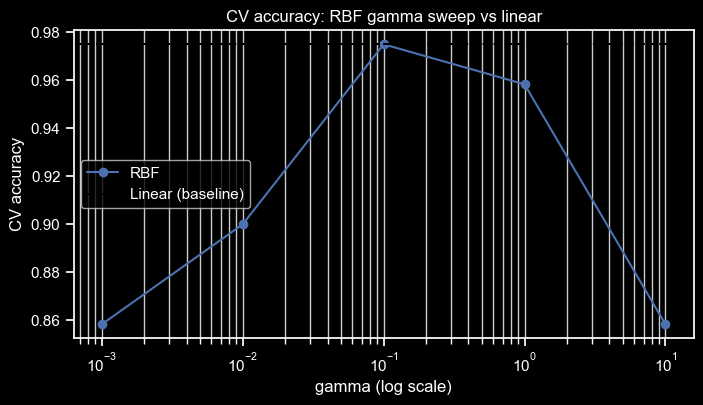

In [ ]:
# Compare linear vs RBF across a range of gamma values (with fixed C).

gammas = [0.001, 0.01, 0.1, 1.0, 10.0]
C_fixed = 1.0
rows = []

# Linear reference
linear_ref = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=C_fixed, random_state=RANDOM_STATE))
])
lin_cv = cross_val_score(linear_ref, X_train, y_train, cv=cv, scoring="accuracy").mean()
rows.append({"model": "linear", "C": C_fixed, "gamma": np.nan, "cv_acc": lin_cv})

for g in gammas:
    rbf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", C=C_fixed, gamma=g, random_state=RANDOM_STATE))
    ])
    cv_acc = cross_val_score(rbf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    rows.append({"model": "rbf", "C": C_fixed, "gamma": g, "cv_acc": cv_acc})

kernel_compare = pd.DataFrame(rows)
print(kernel_compare)

plt.figure(figsize=(8, 4))
rbf_part = kernel_compare[kernel_compare["model"] == "rbf"].copy()
plt.semilogx(rbf_part["gamma"], rbf_part["cv_acc"], marker="o", label="RBF")
plt.axhline(lin_cv, color="black", linestyle="--", label="Linear (baseline)")
plt.title("CV accuracy: RBF gamma sweep vs linear")
plt.xlabel("gamma (log scale)")
plt.ylabel("CV accuracy")
plt.legend()
plt.grid(True, which="both", axis="x")
plt.show()


## 💡 Interpretation of the results

You compared a linear SVM (baseline) to several RBF SVM models with a fixed C = 1.0 while sweeping gamma over {0.001, 0.01, 0.1, 1.0, 10.0}.

- The linear baseline achieves a cross-validated accuracy of 0.975; gamma is not applicable for the linear kernel.
- The RBF results vary with gamma as follows:
  - gamma = 0.001: 0.858
  - gamma = 0.01: 0.900
  - gamma = 0.1: 0.975
  - gamma = 1.0: 0.958
  - gamma = 10.0: 0.858
- The best RBF result matches the linear baseline at gamma = 0.1 (0.975); the other gamma values yield lower CV accuracy.

The accompanying visualization reinforces these findings: the plot uses a log-scale gamma axis and shows a dashed line for the linear baseline with RBF points across the gamma sweep. It depicts a rise in performance toward a peak near gamma ≈ 0.1, reaching about 0.97–0.98 CV accuracy, while the linear baseline remains a steady reference. Beyond the peak, increasing gamma reduces accuracy, illustrating overfitting with highly localized influence.

Key takeaway: with C fixed at 1.0, none of the tested RBF configurations clearly outperform the linear SVM. The moderate gamma around 0.1 yields parity with the linear model, while too small or too large gamma values degrade performance.

## 🔧 Hyperparameter Tuning: C and Gamma with Proper Validation

This step searches for the best-performing **RBF SVM** settings by tuning two key hyperparameters—**`C`** and **`gamma`**—while using **cross-validation** to get a reliable estimate of performance.

### What we’re optimizing
- **`C` (regularization strength):** Controls how strongly the model tries to avoid misclassifying training points. Larger values can fit the training data more tightly; smaller values encourage a smoother decision boundary.
- **`gamma` (RBF kernel width):** Controls how far the influence of a single training example reaches. Larger values produce more localized, complex boundaries; smaller values produce broader, smoother boundaries.

Because both parameters affect model behavior multiplicatively, we search them on **log-spaced ranges** (spanning orders of magnitude) rather than linear ranges.

### Why it’s done inside a Pipeline with cross-validation
The search is performed on a **Pipeline** that includes both **feature scaling** and the **SVM**, ensuring that scaling is learned *only from the training folds* during cross-validation. This prevents subtle validation leakage and makes the hyperparameter comparison fair.

### What you should take away
- The grid search returns **best hyperparameters** based on average cross-validation accuracy.
- The summarized results (mean and standard deviation across folds) help you see not only what performs best, but also how **stable** performance is across splits.
- The output `best_model` is a **refit pipeline** using the best `C` and `gamma`, ready for evaluation on held-out data or deployment.

In [ ]:
# Grid search over log-scale ranges for C and gamma within the pipeline.

param_grid = {
    "svm__C": np.logspace(-2, 2, 9),
    "svm__gamma": np.logspace(-3, 1, 9),
}

rbf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", random_state=RANDOM_STATE))
])

grid = GridSearchCV(
    rbf_pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    refit=True,
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

results = pd.DataFrame(grid.cv_results_)
results = results.sort_values(by="mean_test_score", ascending=False)
display(results[["mean_test_score", "std_test_score", "param_svm__C", "param_svm__gamma"]].head(10))

best_model = grid.best_estimator_


Best params: {'svm__C': np.float64(1.0), 'svm__gamma': np.float64(0.1)}
Best CV accuracy: 0.975


,mean_test_score,std_test_score,param_svm__C,param_svm__gamma
40,0.975000,0.020412,1.000000,0.100000
73,0.975000,0.033333,100.000000,0.003162
65,0.975000,0.033333,31.622777,0.010000
57,0.975000,0.033333,10.000000,0.031623
56,0.975000,0.020412,10.000000,0.010000
66,0.975000,0.033333,31.622777,0.031623
49,0.975000,0.020412,3.162278,0.100000
64,0.975000,0.020412,31.622777,0.003162
72,0.975000,0.020412,100.000000,0.001000
59,0.966667,0.016667,10.000000,0.316228


## 💡 Interpretation of the results

- Best parameters and their performance: The top-performing configuration is C = 1.0 and gamma = 0.1, with a cross-validated accuracy of 0.975 (97.5%).

- How to read the results: Each row corresponds to a specific (C, gamma) pair. The key columns are mean_test_score (average accuracy across CV folds), std_test_score (variability across folds), and the parameter values (param_svm__C and param_svm__gamma). The first several rows show many different pairs that achieve the same mean score of 0.975 but with different stability; one row near the bottom has a slightly lower mean (0.966667), indicating a weaker combination.

- What to take away about model selection:
  - The best_estimator would be the pipeline refitted with C = 1.0 and gamma = 0.1, prepared for evaluation on held-out data.
  - A high CV accuracy around 0.975 with modest variability suggests good and fairly stable generalization across folds.
  - There is a plateau in this region of the hyperparameter space: several nearby C/gamma choices yield the same mean performance, so small changes don’t significantly hurt accuracy.

## ✅ Final Evaluation: Holdout Metrics and Error Analysis

This step performs the **final, most trustworthy evaluation** of the selected `best_model` by testing it on the **untouched test set**. Because the test set was not used for training or model selection, the results here are the best estimate of how the model will perform on new, real-world data.

### What you learn from this evaluation

- **Overall test accuracy** provides a quick summary of performance, but it can hide class-specific weaknesses.
- The **classification report** breaks performance down by class using **precision** and **recall**, helping you see which classes are being predicted reliably and which ones are being missed or confused.
- The **confusion matrix** visualizes *where* errors happen: which true classes are most often predicted as which other classes. This is especially useful for spotting systematic confusion between specific pairs of classes.

### Error analysis: inspecting misclassifications

Beyond metrics, this step lists the **misclassified test examples** (true label vs. predicted label), along with their feature values when available. Reviewing these cases helps you diagnose:
- **Overlapping classes** (samples that genuinely look similar in feature space),
- **Bias toward certain classes** (a model repeatedly predicting one label in ambiguous situations),
- **Patterns in failure cases** that suggest what kinds of inputs the model struggles with.

The goal is not just to measure performance, but to understand the *shape* of the model’s errors so you can interpret results responsibly.

Test accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



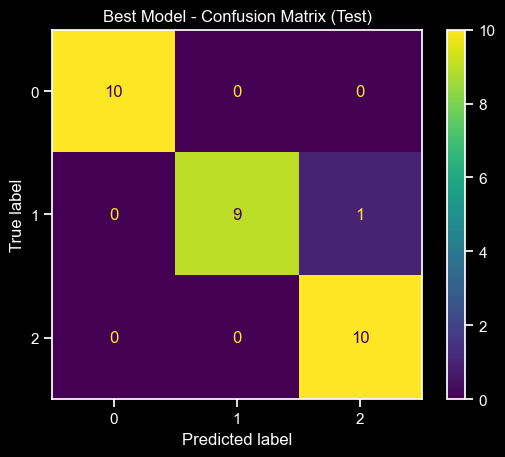

# misclassified: 1


,index_in_test,true,pred,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,25,1,2,6.7,3.0,5.0,1.7


In [ ]:
# Evaluate the selected model on the untouched test set.

y_test_pred = best_model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format="d")
plt.title("Best Model - Confusion Matrix (Test)")
plt.show()

# Inspect misclassifications
mis_idx = np.where(y_test_pred != y_test)[0]
print("# misclassified:", len(mis_idx))

if len(mis_idx) > 0:
    # Show a small table of misclassified samples with predicted vs true
    mis_table = pd.DataFrame({
        "index_in_test": mis_idx,
        "true": y_test[mis_idx],
        "pred": y_test_pred[mis_idx],
    })

    # Add feature values if feature names available
    X_test_df = pd.DataFrame(X_test, columns=feature_names if feature_names is not None else [f"x{i}" for i in range(X_test.shape[1])])
    mis_table = pd.concat([mis_table.reset_index(drop=True), X_test_df.iloc[mis_idx].reset_index(drop=True)], axis=1)
    display(mis_table)


## 💡 Interpretation of the results

- You evaluated the best model on an untouched test set, reporting a final accuracy of about 0.967 (96.7%) computed over 30 samples. This reflects very high overall correctness.

- Per-class performance shows strong metrics, with Class 0 achieving perfect precision and recall (1.00). Class 1 has precision 1.00 and recall 0.90 (F1 ≈ 0.95). Class 2 has precision ≈ 0.91 and recall 1.00 (F1 ≈ 0.95). The overall averages hover around 0.97, indicating robust performance but a small weakness between classes 1 and 2.

- The confusion matrix visual confirms this pattern: most samples are classified correctly (diagonal values are large). There is a single misclassification, where a true Class 1 sample is predicted as Class 2.

- The misclassified instance details align across outputs: index_in_test 25, true label 1, predicted label 2, with feature values (sepal length 6.7 cm, sepal width 3.0 cm, petal length 5.0 cm, petal width 1.7 cm).

- The accompanying heatmap reinforces these insights: diagonal counts are high (10 for Class 0, 9 for Class 1, 10 for Class 2), and only one off-diagonal misclassification exists (true Class 1 → predicted Class 2). Overall, 29 of 30 predictions are correct.

Takeaway: the model distinguishes all three classes quite well, with only a minor confusion between classes 1 and 2. Focusing on that specific boundary could yield a small improvement, but the current result already reflects strong performance on this task.